# Engish-Hindi Translator 

1. Implemented custom loss

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time 
import numpy as np
import pandas as pd
import random
random.seed=22

In [ ]:
# Import data
hin=open('/content/drive/MyDrive/Projects/English-HIndi Translator /IITB.en-hi.hi','r')
hin_inp=hin.read()
hin_inp=hin_inp.split('\n')
hin.close()
eng=open('/content/drive/MyDrive/Projects/English-HIndi Translator /IITB.en-hi.en','r')
eng_inp=eng.read()
eng_inp=eng_inp.split('\n')
eng.close()


# Shuffle the data
k=list(zip(eng_inp,hin_inp))
random.shuffle(k)
k=[i for i in k if len(i[0].split())<20 and len(i[1].split())<20 and len(i[0].split())>2 and len(i[1].split())>2]
eng=[j for (j,i) in k]
hin=[i for (j,i) in k]



In [ ]:
# Tokenizing english text
tokenizer_eng=tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer_eng.fit_on_texts(eng)
trn_eng=tokenizer_eng.texts_to_sequences(eng)

# Tokenizing hindi text
tokenizer_hin=tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer_hin.fit_on_texts(hin)
trn_hin=tokenizer_hin.texts_to_sequences(hin)


mean length for Hindi sentence =9.791752295420268, for english=9.057902839670216
STD for Hindi sentence length =4.681813211837457, for english=4.391096120831194


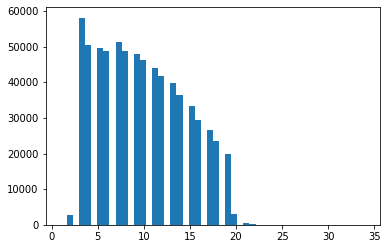

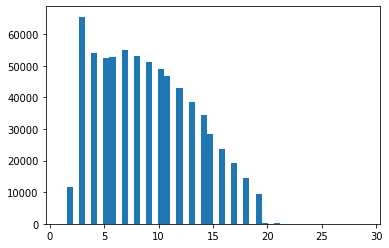



Max len for hindi =34 , for english 29

 Length of dataset= 702159


In [ ]:
# Checking the length of sentences
h=[len(i) for i in trn_hin ]
e=[len(i) for i in trn_eng ]
print('mean length for Hindi sentence ={}, for english={}'.format(np.mean(h),np.mean(e)))
print('STD for Hindi sentence length ={}, for english={}'.format(np.std(h),np.std(e)))


plt.hist(h ,bins=50)
plt.show()
plt.hist(e ,bins=50)
plt.show()

# max len \
print('\n\nMax len for hindi ={} , for english {}'.format(max(h),max(e)))
print('\n Length of dataset=',len(trn_eng))

In [ ]:
# We can pad the sequence upto its max length

hn=tf.keras.preprocessing.sequence.pad_sequences(
    trn_hin, maxlen=19, dtype='int32', padding='post', truncating='post',
    value=0.0)

en=tf.keras.preprocessing.sequence.pad_sequences(
    trn_eng, maxlen=19, dtype='int32', padding='post', truncating='post',
    value=0.0)


# Lets check the vocab length

print('Length of Hindi vocab {} and english vocab {}'.format(len(tokenizer_hin.word_index),len(tokenizer_eng.word_index)))

Length of Hindi vocab 181955 and english vocab 118534


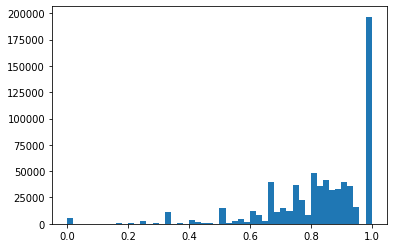

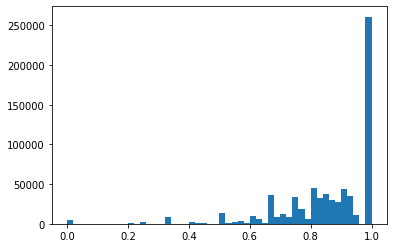

In [ ]:
# We don't want to train our model on OOV words so lets see its distribution in our training set

h=[np.nonzero(a>1)[0].shape[0]/np.nonzero(a)[0].shape[0] for a in hn]
e=[np.nonzero(a>1)[0].shape[0]/np.nonzero(a)[0].shape[0] for a in en]


plt.hist(h ,bins=50)
plt.show()
plt.hist(e ,bins=50)
plt.show()



In [ ]:
# Lets remove sentences containing OOV words
h=[i for i in range(len(hn)) if 1 not in hn[i]]
hn_=hn[h]
en_=en[h]

e=[i for i in range(len(en_)) if 1 not in en_[i]]
train_out=hn_[e]
train_inp=en_[e]

assert len(train_inp)==len(train_out), 'something went wrong'

# Lets check few example
tokenizer_hin.index_word[0]='<pad>'
tokenizer_eng.index_word[0]='<pad>'
for n in range(5):
  r=random.randint(10,10000)
  a=train_inp[r]
  b=train_out[r]
  print([tokenizer_eng.index_word[i] for i in a],'\n',[tokenizer_hin.index_word[i] for i in b])

['nay', 'but', 'they', 'are', 'in', 'doubt', 'playing', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'] 
 ['लेकिन', 'ये', 'लोग', 'तो', 'शक़', 'में', 'पड़े', 'खेल', 'रहे', 'हैं', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['well', 'the', 'means', 'should', 'be', 'exactly', 'the', 'same', 'so', 'here', 'it', 'would', 'be', '7', '5', 'and', 'here', '<pad>', '<pad>'] 
 ['खैर', 'इसका', 'मतलब', 'वास्तव', 'में', 'एक', 'ही', 'होना', 'चाहिए', 'यहाँ', 'तो', 'यह', '7', '5', 'हो', 'सकता', 'है', 'और', 'यहाँ']
['ten', 'times', 'twelve', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'] 
 ['10', 'गुना', '12', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['major', 'industries', 'in', 'the', 'state', 'are', '<pad>', 

mean length for Hindi sentence =7.470052942643026, for english=6.862422455893352
STD for Hindi sentence length =3.914417655668919, for english=3.6126042930806803


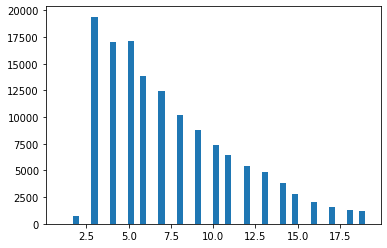

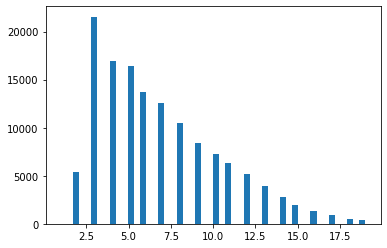



Max len for hindi =19 , for english 19

 Length of dataset= 136374


In [ ]:
# Lets again check the sentence length distribution
# Checking the length of sentences
h=[np.nonzero(i>0)[0].shape[0] for i in train_out ]
e=[np.nonzero(i>0)[0].shape[0] for i in train_inp ]
print('mean length for Hindi sentence ={}, for english={}'.format(np.mean(h),np.mean(e)))
print('STD for Hindi sentence length ={}, for english={}'.format(np.std(h),np.std(e)))


plt.hist(h ,bins=50)
plt.show()
plt.hist(e ,bins=50)
plt.show()

# max len \
print('\n\nMax len for hindi ={} , for english {}'.format(max(h),max(e)))
print('\n Length of dataset=',len(train_inp))

In [ ]:
# Add pad and start word.

# In english vocab add <pad>  token 
tokenizer_eng.word_index['<pad>'] = 0



# In hindi vocab add <pad> and <start> token 
tokenizer_hin.word_index['<pad>']=0
tokenizer_hin.word_index['<start>'] = 5000


print('Now the size of the vocab is now, for hindi {} and eng {}'.format(len(tokenizer_hin.word_index),len(tokenizer_eng.word_index)))

# Create reverse Dictionary 

hn_itow={i:j for j,i in tokenizer_hin.word_index.items()}
en_itow={i:j for j,i in tokenizer_eng.word_index.items()}

Now the size of the vocab is now, for hindi 181957 and eng 118535


In [ ]:
train_out.shape 

(136374, 19)

In [ ]:
train_inp.shape

(136374, 19)

#Attention mechanism for word alignmnt 

Implementing the paper's archetacture  

Paper- NEURAL MACHINE TRANSLATION
BY JOINTLY LEARNING TO ALIGN AND TRANSLATE
by - Dzmitry Bahdanau


  1. The Encoder -Decoder architecture is as follows-

  Encoder = Input --> Embedding with 24 vector size ---> Bi-Directional lstm with 22 units.
    
  Decoder = Output --> Bidirectional lstm 25 units--> softmax Dense
    

In [ ]:
# Encoder

# Building encoder with bidirectional lstm
tf.keras.backend.clear_session()

class Encoder(tf.keras.Model):
  def __init__(self):
    super(Encoder,self).__init__()
    self.em=tf.keras.layers.Embedding(5000,256)
    self.drop=tf.keras.layers.Dropout(0.2)
    self.drop1=tf.keras.layers.Dropout(0.2)
    self.enc=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,activation='relu',return_state=True,return_sequences=True))
    #self.enc1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(15,activation='relu',return_state=True))

  @tf.function
  def call(self,inputs):
    emb=self.em(inputs)
    d1=self.drop(emb)
    en1=self.enc(d1)
    #d2=self.drop1(en1[0])
    #en2=self.enc1(d2)
    #out=tf.reshape(en1[0],(en1[0].shape[0],1,30))
    hid=tf.concat([en1[1],en1[2]],axis=1)
    return en1[0],hid

enc=Encoder()

In [ ]:
# Testing the input
# Required output shape==> (batch,maxlen,hidden_state)  ==(2,22,44)
inp=train_inp[:2]
#o=enc(inp)
out,hid=enc(inp)
assert out.shape==(2,19,128), 'Somthing went wrong with out'
assert hid.shape==(2,128), 'Somthing went wrong with hidden output'
print('looks fine')

looks fine


In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self,units):
    super(BahdanauAttention,self).__init__()
    self.w1=tf.keras.layers.Dense(units)
    self.w2=tf.keras.layers.Dense(units)
    self.v=tf.keras.layers.Dense(1)
    self.activation = tf.keras.layers.Activation('tanh')
    #self.activation1 = tf.keras.layers.Activation('softmax')
    #self.soft=tf.keras.activations.softmax(axis=1)

  #@tf.function
  def call(self,dec_hid,enc_out):
    x=self.w1(dec_hid)+self.w2(enc_out)
    x=self.activation(x)
    x=self.v(x)
    wghts=tf.keras.activations.softmax(x,axis=1)
    context_vector=wghts*enc_out
    context_vector=tf.reduce_sum(context_vector,axis=1)
    return wghts,context_vector


#units=30
at=BahdanauAttention(128)

In [ ]:
#Testing bahdanau's attention word alignment

init=tf.random_normal_initializer()
dec_hid=tf.Variable(initial_value=init(shape=(2,1,128),dtype=tf.float32))
enc_out=out

# Expected weights output shape ==> (batch,maxlen,1) ==> (2,15,1)
# Expected context vector output shape ==> (batch,hidden) ==> (2,15)
weights,context_vector=at(dec_hid,enc_out)
assert weights.shape==(2,19,1), 'Somthing went wrong with weights'
assert context_vector.shape==(2,128), 'Somthing went wrong with context_vector'
print('looks fine')

# Printing the weights
weights

looks fine


<tf.Tensor: shape=(2, 19, 1), dtype=float32, numpy=
array([[[0.05355104],
        [0.05294808],
        [0.05339638],
        [0.05282842],
        [0.05261099],
        [0.0525266 ],
        [0.05249444],
        [0.0524826 ],
        [0.05247824],
        [0.05247613],
        [0.05247409],
        [0.05247096],
        [0.05246592],
        [0.05245828],
        [0.05244783],
        [0.05243604],
        [0.05242932],
        [0.0524497 ],
        [0.05257495]],

       [[0.05352543],
        [0.0524766 ],
        [0.05344094],
        [0.05313791],
        [0.05265778],
        [0.05139646],
        [0.05289269],
        [0.05346818],
        [0.05346312],
        [0.05307414],
        [0.05346812],
        [0.05269337],
        [0.05200032],
        [0.05201331],
        [0.05202155],
        [0.0520228 ],
        [0.05202399],
        [0.05204847],
        [0.05217483]]], dtype=float32)>

In [ ]:
# Decoder
# As we are applying teacher forcing, we can't use Bidirectional layer

class Decoder(tf.keras.Model):
  def __init__(self):
    super(Decoder,self).__init__()
    self.em=tf.keras.layers.Embedding(5001,256)
    self.drop=tf.keras.layers.Dropout(0.2)
    #self.drop1=tf.keras.layers.Dropout(0.2)
    self.dec=tf.keras.layers.GRU(128,activation='relu',return_state=True,return_sequences=True)
    #self.dec1=tf.keras.layers.GRU(21,activation='relu',return_state=True,return_sequences=True)
    self.dense=tf.keras.layers.Dense(5001,activation='sigmoid')
    self.attention=BahdanauAttention(128)
  @tf.function
  def call(self,enc_out,dec_hidden,inp):
    x=self.em(inp)
    weights,context_vector=self.attention(dec_hidden,enc_out)
    context_vector=tf.reshape(context_vector,shape=(context_vector.shape[0],1,context_vector.shape[-1]))
    concat=tf.keras.layers.concatenate([x,context_vector,dec_hidden],axis=2)
    #drop=self.drop(concat)
    dec_out,dec_hidden=self.dec(concat)
    #drop1=self.drop1(dec_out)
    #dec_hidden2=tf.reshape(dec_hidden2,shape=(dec_hidden2.shape[0],1,dec_hidden2.shape[-1]))
    #concat1=tf.keras.layers.concatenate([dec_out,dec_hidden2],axis=2)
    #drop1=self.drop1(concat1)
    #dec_out2,dec_hidden2=self.dec1(drop1)
    pred=self.dense(dec_out)
    return dec_hidden,pred,weights

dec=Decoder()

In [ ]:
#Testing decoder

# Output shapes should be : dec_hidden=(batch,1,hidden)==>(2,1,21),weights=(batch,maxlen,1)==>(2,15,1)
#                           pred=(batch,1,vocab)==>(2,1,347) 

inp=np.array([5000,5000]).reshape((2,1))
dec_hidden,pred,weights=dec(enc_out,dec_hid,inp)

assert weights.shape==(2,19,1), 'Somthing went wrong with weights'
assert dec_hidden.shape==(2,128), 'Somthing went wrong with decoder hidden'
assert pred.shape==(2,1,5001), 'Somthing went wrong with prediction vector'

print('looks good')

looks good


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
# Creating required APIs
ls_ = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
loss_ = tf.keras.losses.SparseCategoricalCrossentropy(reduction='none')
acc=tf.keras.metrics.Accuracy()
def loss_fun(yr,yp):
  mask=tf.math.logical_not(tf.math.equal(yr,0))
  loss=loss_(yr,yp)
  mask=tf.cast(mask,dtype=loss.dtype)
  loss=loss*mask
  return tf.reduce_mean(loss)

In [ ]:
# with autograph

class Test_step():
  def __init__(self,batch):
    self.batch=batch
    #initializer=tf.random_normal_initializer(seed=33)
    #self.dec_hidden=tf.Variable(initial_value=initializer(shape=(batch,1,21),dtype=tf.float32))
    #self.dec_hidden=tf.ones(shape=(batch,1,21))
    self.dec_input=np.array([5000]*batch).reshape(batch,1)
    self.pred_out=[]
    self.wghts=[]
    self.loss=0

  @tf.function
  def  __call__(self,inp,out):
    dec_inp=self.dec_input
    #dec_hid=self.dec_hidden
    with tf.GradientTape() as tape:
      enc_out,dec_hid=enc(inp)
      dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
      for i in range(out.shape[1]):
        dec_hid,pred,weights=dec(enc_out,dec_hid,dec_inp)
        dec_inp=tf.reshape(out[:,i],shape=(self.batch,1))
        dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
        self.pred_out.append(pred)
        self.wghts.append(weights)

      ypred=tf.concat(self.pred_out,axis=1)
      weight=tf.concat(self.wghts,axis=2)
      ls=ls_(out,ypred)

    variables = enc.trainable_variables + dec.trainable_variables
    gradients = tape.gradient(ls, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    #self.dec_hidden=dec_hid
    return ls,ypred,weight


#step=Test_step(30)

In [ ]:
# checking if training is actually happening or not
'''
batch=30
initializer=tf.random_normal_initializer(seed=33)
dec_hid=tf.Variable(initial_value=initializer(shape=(batch,1,21),dtype=tf.float32))
'''

# Test 1
step=Test_step(30)
inp=train_inp[:30]
out=train_out[:30]

ls,ypred,weights=step(inp,out)
print(ls)

tf.Tensor(8.517337, shape=(), dtype=float32)


In [ ]:
# Test 2
inp=train_inp[30:60]
out=train_out[30:60]

ls,ypred,weights=step(inp,out)
print(ls)

tf.Tensor(8.514573, shape=(), dtype=float32)


In [ ]:
# Test 3
inp=train_inp[60:90]
out=train_out[60:90]

ls,ypred,weights=step(inp,out)
print(ls)

tf.Tensor(8.5121, shape=(), dtype=float32)


In [ ]:
class Prediction():
  def __init__(self,batch):
    self.batch=batch
    #initializer=tf.random_normal_initializer(seed=33)
    #self.dec_hidden=tf.Variable(initial_value=initializer(shape=(batch,1,21),dtype=tf.float32))
    self.dec_input=np.array([5000]*batch).reshape(batch,1)
    self.pred_out=[]
    self.wghts=[]


  @tf.function
  def __call__(self,inp):
    dec_inp=self.dec_input
    #dec_hid=self.dec_hidden
    enc_out,dec_hid=enc(inp)
    dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
    for i in range(19):
      dec_hid,pred,weights=dec(enc_out,dec_hid,dec_inp)
      dec_inp=tf.reshape(tf.math.argmax(pred,axis=2),shape=(self.batch,1))
      dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
      self.pred_out.append(pred)
      self.wghts.append(weights)
    weight=tf.concat(self.wghts,axis=2)
    ypred=tf.concat(self.pred_out,axis=1)
    return ypred,weight


predict=Prediction(30)

In [ ]:
# Testing the predict function

# Output shapes should be : weights=(batch,maxlen_inp,maxlen_output)==>(5,15,21)
#                           ypred=(batch,21,vocab)==>(5,21,347) 

inp=train_inp[:30]
ypred,weight=predict(inp)
assert weight.shape==(inp.shape[0],19,19), 'Somthing went wrong with weights'
assert ypred.shape==(inp.shape[0],19,5001) , 'Somthing went wrong with prediction vector'

print('looks good')

looks good


In [ ]:
# Lets train the model for 20 epochs
import time 
# Training...
batch=64
step=Test_step(batch)
trn=tf.data.Dataset.from_tensor_slices((train_inp,train_out)).batch(batch,drop_remainder=True)
epochs=20
print('Training starts ...')
for j in range(epochs):
  t=time.time()
  print('\n\n---Epoch {}  :----'.format(j))
  a=[]
  l=[]
  for i,(inp,out) in enumerate(trn):
    ls,ypred,weight=step(inp,out)
    ypred=tf.math.argmax(ypred,axis=2)
    ypred=tf.reshape(ypred,shape=out.shape)
    ac=acc(ypred,out)
    l.append(ls)
    a.append(ac)
    if (i+1)%10==0:
      #print('At {}th batch    mean_loss={} , mean_accuracy={}'.format(i,np.mean(l),np.mean(a)))
      ma=np.mean(a)
      ml=np.mean(l)
      a=[]
      l=[]
    if (i+1)%500==0:
      print('At {}th batch    mean_loss={} , mean_accuracy={}'.format(i+1,ml,ma))
  #ypred,weight=predict(val_input)
  #val_loss=loss_(val_output,ypred)*30/val_input.shape[0]
  #ypred=tf.math.argmax(ypred,axis=2)
  #ypred=tf.reshape(ypred,shape=val_output.shape)
  #val_ac=acc(ypred,val_output)
  t=time.time()-t
  print('\nTime required for {}th epoch : {}'.format(j+1,t))

Training starts ...


---Epoch 0  :----
At 500th batch    mean_loss=2.410940647125244 , mean_accuracy=0.4805825650691986
At 1000th batch    mean_loss=2.0881245136260986 , mean_accuracy=0.5605556964874268
At 1500th batch    mean_loss=1.9652656316757202 , mean_accuracy=0.5981670618057251
At 2000th batch    mean_loss=1.7094253301620483 , mean_accuracy=0.6220645308494568

Time required for 1th epoch : 1069.749685049057


---Epoch 1  :----
At 500th batch    mean_loss=1.5149667263031006 , mean_accuracy=0.6441609859466553
At 1000th batch    mean_loss=1.4487676620483398 , mean_accuracy=0.6581706404685974
At 1500th batch    mean_loss=1.4266791343688965 , mean_accuracy=0.6703713536262512
At 2000th batch    mean_loss=1.282401204109192 , mean_accuracy=0.6812239289283752

Time required for 2th epoch : 1058.7160897254944


---Epoch 2  :----
At 500th batch    mean_loss=1.155612826347351 , mean_accuracy=0.6932774186134338
At 1000th batch    mean_loss=1.1483254432678223 , mean_accuracy=0.70160210132598

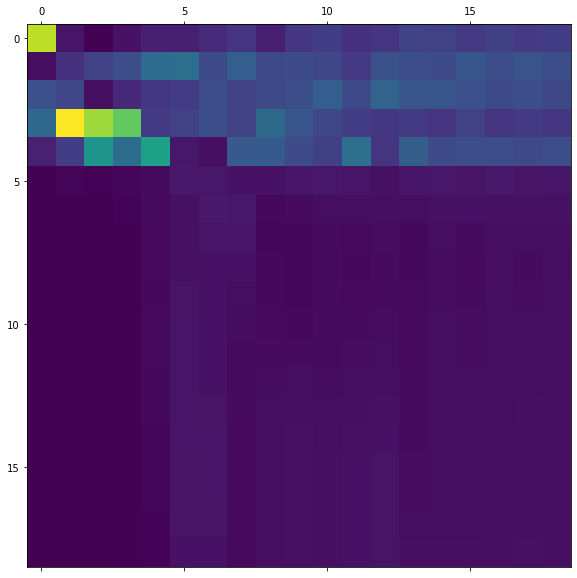

In [ ]:
inp=train_inp[2001].reshape((1,19))
out=train_out[2001]

p=Prediction(1)

ypred,weight=p(inp)
weight=tf.reshape(weight,shape=(19,19))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(weight, cmap='viridis')
plt.show()

In [ ]:
import random
for k in range(10):
  p=random.randint(10,2500)
  inp=train_inp[p].reshape((1,19))
  out=train_out[p]

  p=Prediction(1)

  ypred,weight=p(inp)

  ypr=tf.math.argmax(ypred,axis=2)
  print([en_itow[i] for i in inp.reshape((19))])
  print([hn_itow[i] for i in out])
  print([hn_itow[i] for i in ypr.numpy().reshape((19))])

['there', 'is', 'one', 'museum', 'of', 'thing', 'which', 'is', 'related', 'to', 'him', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['यहाँ', 'उनसे', 'संबंधित', 'वस्तुओं', 'का', 'एक', 'संग्रहालय', 'भी', 'है।', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['वे', 'जो', 'एक', 'संग्रहालय', 'का', 'विषय', 'है।', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['to', 'promote', 'entrepreneurship', 'in', 'the', 'area', 'of', 'environmental', 'goods', 'and', 'services', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['पर्यावरणीय', 'सामग्री', 'तथा', 'सेवाओं', 'के', 'क्षेत्र', 'में', 'उद्यमिता', 'को', 'बढ़ावा', 'देना।', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['पर्यावरणीय', 'सामग्री', 'और', 'सेवाओं', 'के', 'क्षेत्र', 'में', 'प्रशिक्षण', 'देना', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad